In [9]:
# 導入函式庫
import pandas as pd
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

Using TensorFlow backend.


In [42]:
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
#tmp = np.loadtxt("dataset.csv", dtype=np.str, delimiter=",")
tmp=pd.read_csv("dataset.csv",encoding="big5").round()
#data = tmp[1:,1:].astype(np.float)
print(tmp)
X=tmp[['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y=tmp['Chance of Admit ']
print(X)
print(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.0   4.0  10.0   
1             2        324          107                  4  4.0   4.0   9.0   
2             3        316          104                  3  3.0   4.0   8.0   
3             4        322          110                  3  4.0   2.0   9.0   
4             5        314          103                  2  2.0   3.0   8.0   
5             6        330          115                  5  4.0   3.0   9.0   
6             7        321          109                  3  3.0   4.0   8.0   
7             8        308          101                  2  3.0   4.0   8.0   
8             9        302          102                  1  2.0   2.0   8.0   
9            10        323          108                  3  4.0   3.0   9.0   
10           11        325          106                  3  4.0   4.0   8.0   
11           12        327          111             

In [43]:
tmp.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.0,4.0,10.0,1,1.0
1,2,324,107,4,4.0,4.0,9.0,1,1.0
2,3,316,104,3,3.0,4.0,8.0,1,1.0
3,4,322,110,3,4.0,2.0,9.0,1,1.0
4,5,314,103,2,2.0,3.0,8.0,0,1.0


In [44]:
# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=399, input_dim=X.shape[1], kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [45]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [49]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train,num_classes=2) 
y_TestOneHot = np_utils.to_categorical(y_test) 
# y_TrainOneHot = np_utils.to_categorical(y_train) 
# y_TestOneHot = np_utils.to_categorical(y_test) 
y_TrainOneHot.shape

(300, 2)

In [50]:
# 將 training 的 input 資料轉為2維
# X_train_2D = X_train.reshape
# X_test_2D = X_test.reshape
X_train_2D = X_train.values.reshape(-1, 1)
X_test_2D = X_test.values.reshape(-1, 1)

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255
x_Train_norm.shape

(2400, 1)

In [52]:
# 進行訓練, 訓練過程會存在 train_history 變數中
#train_history = model.fit(x=x_Train_norm, y=y_train, validation_split=0.2, epochs=10, batch_size=800, verbose=2)

In [54]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

ValueError: Error when checking input: expected dense_7_input to have shape (8,) but got array with shape (1,)

In [55]:
# 預測(prediction)
X = x_Test_norm[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

ValueError: Error when checking input: expected dense_7_input to have shape (8,) but got array with shape (1,)

In [87]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training
import pandas as pd
import csv  

def loadCSVfile2():
    tmp = np.loadtxt("detaset.csv", dtype=np.str, delimiter=",")
    data = tmp[1:,1:].astype(np.float)#加载数据部分
    label = tmp[1:,0].astype(np.float)#加载类别标签部分
    return data, label 
————————————————
版权声明：本文为CSDN博主「拾毅者」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/Dream_angel_Z/article/details/48896381
print
# # input data
# inputs = np.array([[0, 1, 0],
#                    [0, 1, 1],
#                    [0, 0, 0],
#                    [1, 0, 0],
#                    [1, 1, 1],
#                    [1, 0, 1]])
# # output data
# outputs = np.array([[0], [0], [0], [1], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
#         self.weights = np.array([[.50], [.50], [.50]])
        self.weights = np.array([[.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
# example = np.array([[1, 1, 0]])
# example_2 = np.array([[0, 1, 1]])
example = np.array([[1, 0]])
example_2 = np.array([[0, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(data)? (<ipython-input-87-924292b0787e>, line 11)

In [69]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

model = Sequential()
model.add(Embedding(output_dim=32,
                    input_dim=3800, 
                    input_length=380))
model.add(Dropout(0.25))
#建立18個RNN神經元
model.add(SimpleRNN(units=18))
model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.25))
model.add(Dense(units=1,activation='sigmoid' ))
model.summary()
scores = model.evaluate(x_test, y_test, verbose=1)
scores[1]

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 18)                918       
_________________________________________________________________
dense_15 (Dense)             (None, 256)               4864      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 127,639
Trainable params: 127,639
Non-trainable params: 0
________________________________________________

NameError: name 'x_test' is not defined

In [60]:
import numpy as np
import matplotlib.pyplot as plt
class Parameter():
  def __init__(self, tensor):
    self.tensor = tensor
    self.gradient = np.zeros_like(self.tensor)

class Layer:
  def __init__(self):
    self.parameters = []

  def forward(self, X):
    return X, lambda D: D

  def build_param(self, tensor):
    param = Parameter(tensor)
    self.parameters.append(param)
    return param

  def update(self, optimizer):
    for param in self.parameters: optimizer.update(param)

class Linear(Layer):
  def __init__(self, inputs, outputs):
    super().__init__()
    self.weights = self.build_param(np.random.randn(inputs, outputs) * np.sqrt(1 / inputs))
    self.bias = self.build_param(np.zeros(outputs))
    
  def forward(self, X):
    def backward(D):
      self.weights.gradient += X.T @ D
      self.bias.gradient += D.sum(axis=0)
      return D @ self.weights.tensor.T
    return X @ self.weights.tensor + self.bias.tensor, backward
  
class Sequential(Layer):
  def __init__(self, *layers):
    super().__init__()
    self.layers = layers
    for layer in layers:
      self.parameters.extend(layer.parameters)
    
  def forward(self, X):
    backprops = []
    Y = X
    for layer in self.layers:
      Y, backprop = layer.forward(Y)
      backprops.append(backprop)
    def backward(D):
      for backprop in reversed(backprops):
        D = backprop(D)
      return D
    return Y, backward
class ReLu(Layer):
  def forward(self, X):
    mask = X > 0
    return X * mask, lambda D: D * mask
  
class Sigmoid(Layer):
  def forward(self, X):
    S = 1 / (1 + np.exp(-X))
    def backward(D):
      return D * S * (1 - S)
    return S, backward
def mse_loss(Y_, Y):
  diff = Y_ - Y.reshape(Y_.shape)
  return np.square(diff).mean(), 2 * diff / len(diff)
  
def ce_loss(Y_, Y):
  num = np.exp(Y_)
  den = num.sum(axis=1).reshape(-1, 1)
  prob = num / den
  log_den = np.log(den)
  ce = np.inner(Y_ - log_den, Y)
  return ce.mean(), Y - prob / len(Y)

In [61]:
class SGDOptimizer():
  def __init__(self, lr=0.1):
    self.lr = lr

  def update(self, param):
    param.tensor -= self.lr * param.gradient
    param.gradient.fill(0)

In [62]:
class Learner():
  def __init__(self, model, loss, optimizer):
    self.model = model
    self.loss = loss
    self.optimizer = optimizer
      
  def fit_batch(self, X, Y):
    Y_, backward = self.model.forward(X)
    L, D = self.loss(Y_, Y)
    backward(D)
    self.model.update(self.optimizer)
    return L
    
  def fit(self, X, Y, epochs, bs):
    losses = []
    for epoch in range(epochs):
      p = np.random.permutation(len(X))
      L = 0
      for i in range(0, len(X), bs):
        X_batch = X[p[i:i + bs]]
        Y_batch = Y[p[i:i + bs]]
        L += self.fit_batch(X_batch, Y_batch)
      losses.append(L)
    return losses

<IPython.core.display.Javascript object>


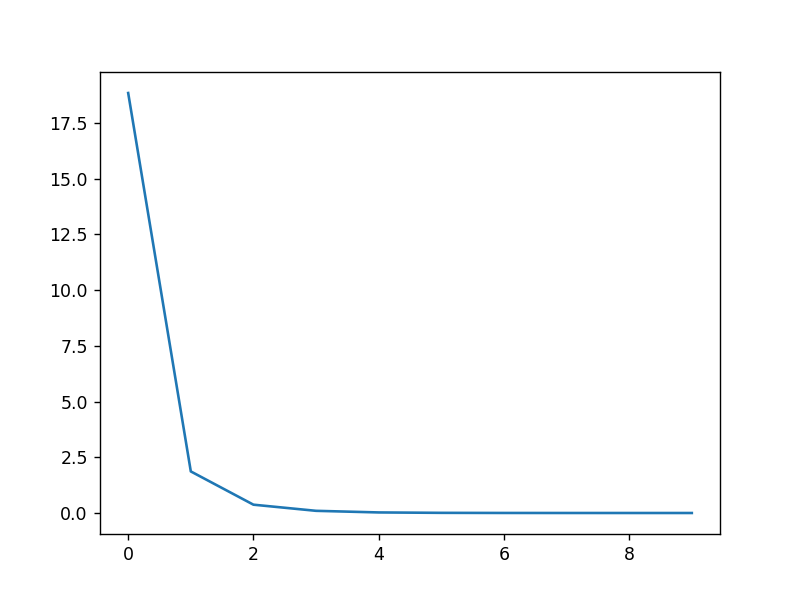

Weight Matrix Error 0.00384972206151904
Bias error 0.0012895054089788883


In [63]:
#@title A simple linear dataset
num_features = 10 #@param {type:"slider", min:5, max:100, step:1}
num_samples = 100 #@param {type:"slider", min:10, max:1000, step:1}
epochs = 10 #@param {type:"slider", min:1, max:100, step:1}
batch_size = 10 #@param {type:"slider", min:1, max:100, step:1}
learning_rate = 0.066 #@param {type:"slider", min:0.001, max:1.0, step:0.001}

m = Linear(num_features, 1)
model = Sequential(m)
l = Learner(model, mse_loss, SGDOptimizer(lr=learning_rate))
X = np.random.randn(num_samples, num_features)
W = np.random.randn(num_features, 1)
B = np.random.randn(1)
Y = X @ W + B + 0.01 * np.random.randn(num_samples, 1)
plt.plot(l.fit(X, Y, epochs=epochs, bs=batch_size))
print('Weight Matrix Error', np.linalg.norm(m.weights.tensor - W))
print('Bias error', np.abs(m.bias.tensor - B)[0])